In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path319 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris319.pkl'
file_path320 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris320.pkl'
file_path321 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris321.pkl'
file_path332 = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris332.pkl'

df319 = pd.read_pickle(file_path319)
df320 = pd.read_pickle(file_path320)
df321 = pd.read_pickle(file_path321)
df332 = pd.read_pickle(file_path332)

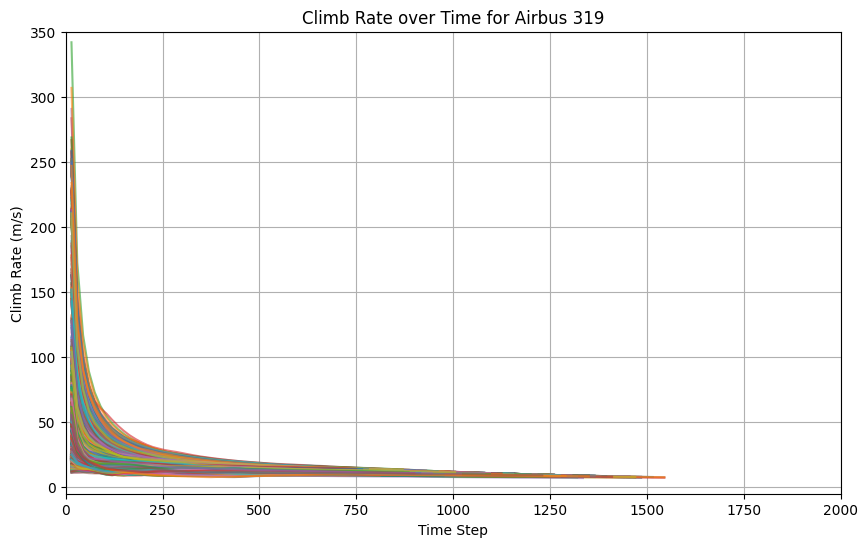

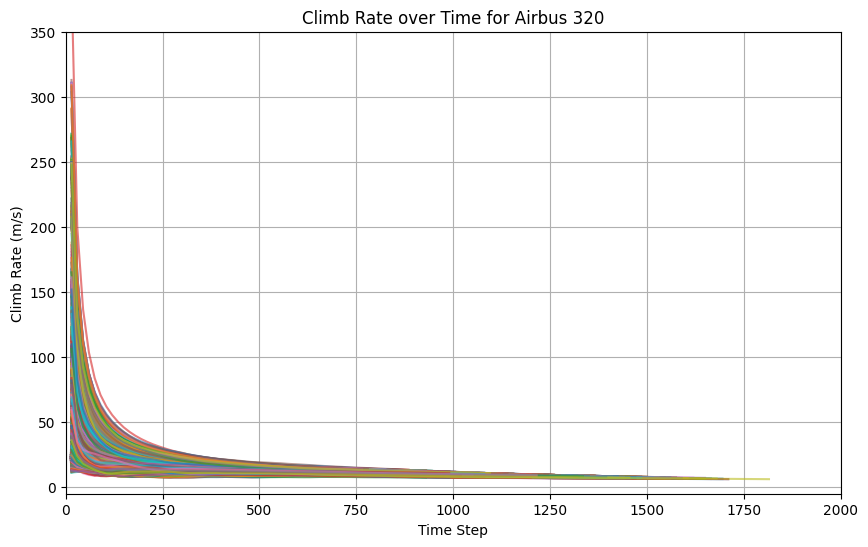

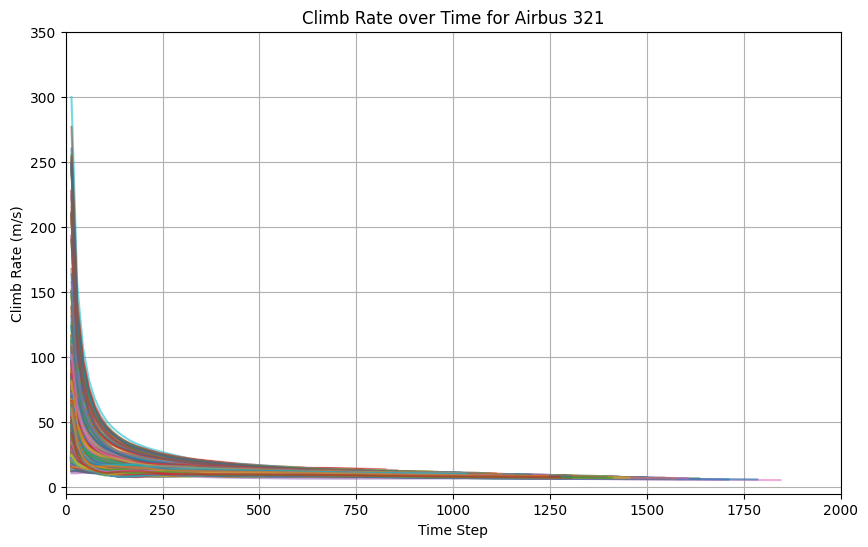

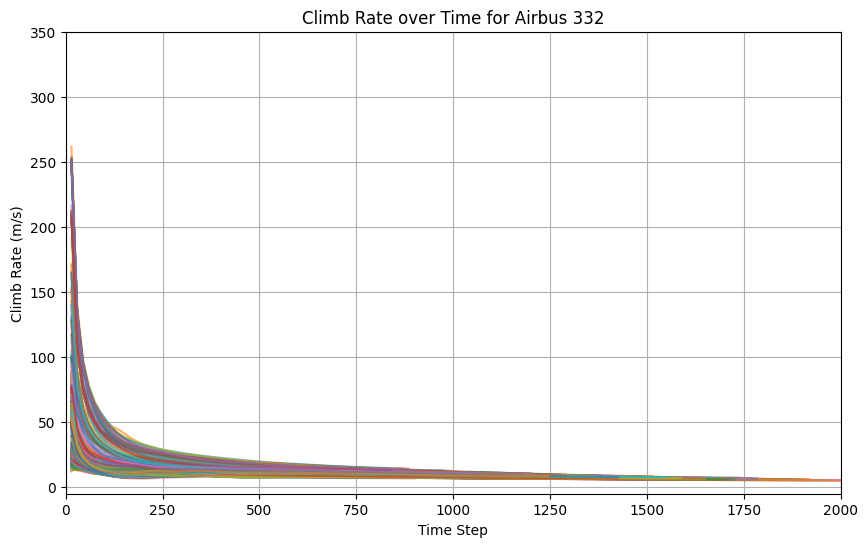

In [3]:
# Function to plot climb rate over time
def plot_climb_rate(df, aircraft_model, xlims, ylims):
    
    plt.figure(figsize=(10, 6))

    df['climb_rate'] = df['baroaltitude'] / df['timestep']  # Calculate climb rate

    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['climb_rate'], label=f'Segment {segment}', alpha=0.6)

    plt.title(f'Climb Rate over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Climb Rate (m/s)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 2000)
y_limits = (-5, 350)

# Plot for each aircraft
plot_climb_rate(df319, 'Airbus 319', x_limits, y_limits)
plot_climb_rate(df320, 'Airbus 320', x_limits, y_limits)
plot_climb_rate(df321, 'Airbus 321', x_limits, y_limits)
plot_climb_rate(df332, 'Airbus 332', x_limits, y_limits)

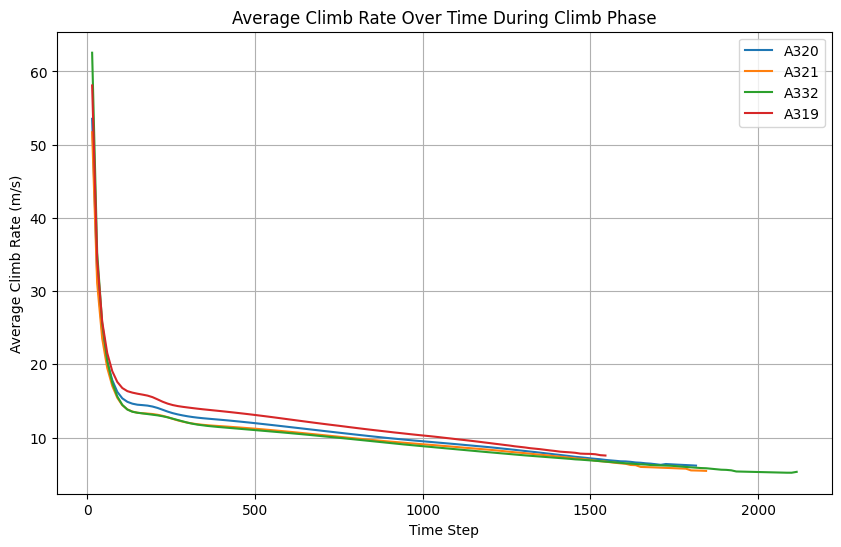

In [20]:
# Path
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}
airplane_models = ['A320', 'A321', 'A332', 'A319']

# Load data
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    # Extract the df for the current aircraft
    df = aircraft_data[file]
    
    # Calculate climb rate 
    df['climb_rate'] = df['baroaltitude'] / df['timestep']

    # Calculate average climb rate over time
    average_climb_rate = df.groupby('timestep')['climb_rate'].mean()
    
    # Plotting
    plt.plot(average_climb_rate, label=model.replace('.pkl', ''))

plt.title('Average Climb Rate Over Time During Climb Phase')
plt.xlabel('Time Step')
plt.ylabel('Average Climb Rate (m/s)')
plt.legend()
plt.grid(True)
plt.show()


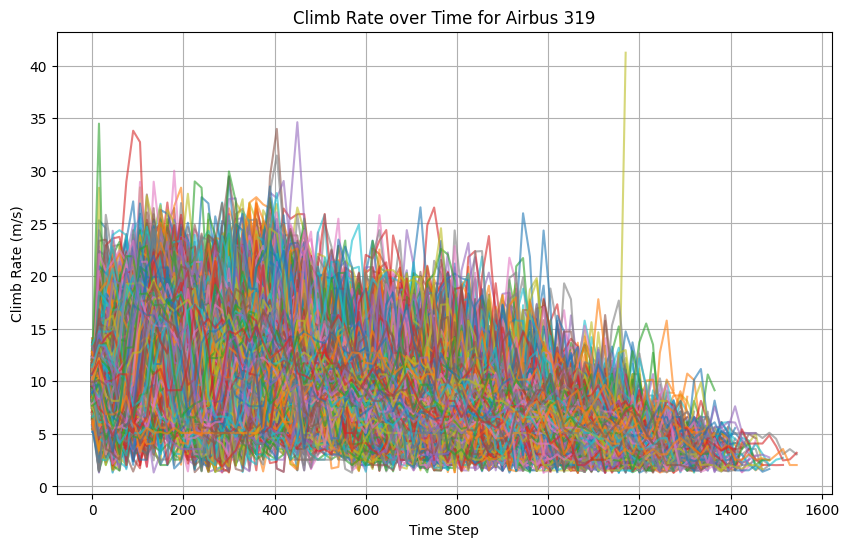

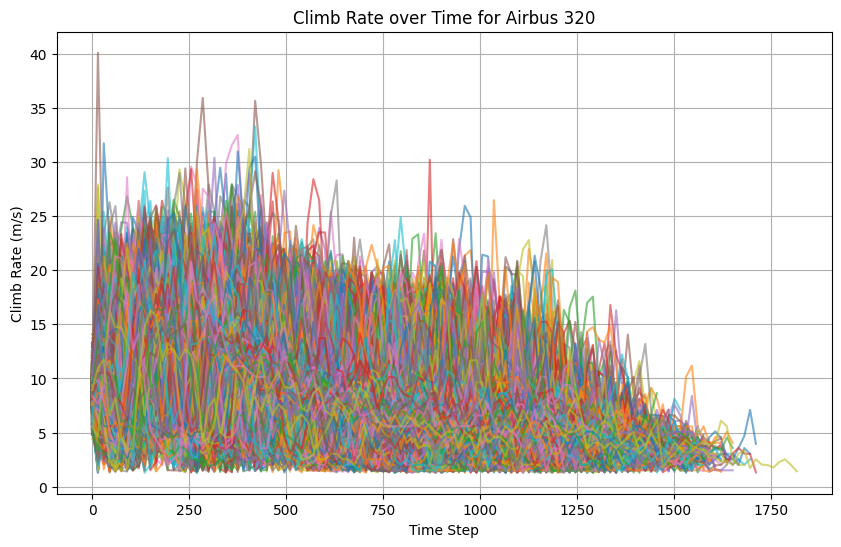

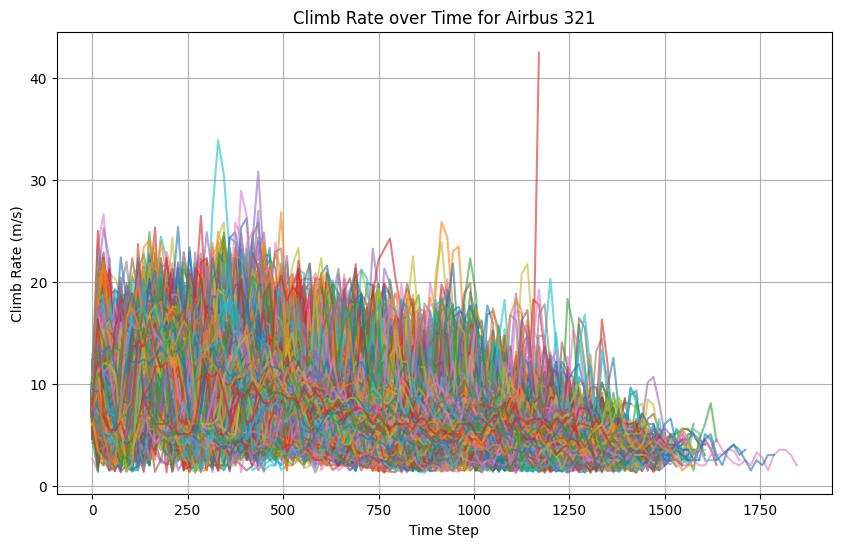

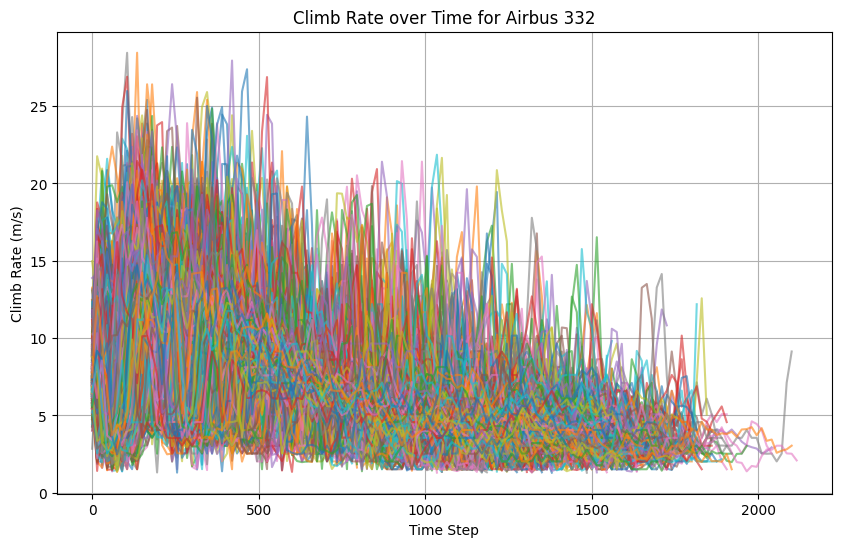

In [9]:
# Function to plot climb rate over time
def plot_climb_rate(df, aircraft_model):
    plt.figure(figsize=(10, 6))
    # Calculate the climb rate
    df['climb_rate'] = df['baroaltitude'].diff() / df['timestep'].diff()  # Calculate climb rate as change in altitude over change in time
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['climb_rate'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Climb Rate over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Climb Rate (m/s)')
    plt.grid(True)
    plt.show()

# Define common x and y limits
# x_limits = (0, 2000)  # Example limits, adjust based on your data
# y_limits = (-5, 15)  # Example limits, adjust as needed to include the full range of your data

# Plot for each aircraft with consistent axis scales
plot_climb_rate(df319, 'Airbus 319')
plot_climb_rate(df320, 'Airbus 320')
plot_climb_rate(df321, 'Airbus 321')
plot_climb_rate(df332, 'Airbus 332')


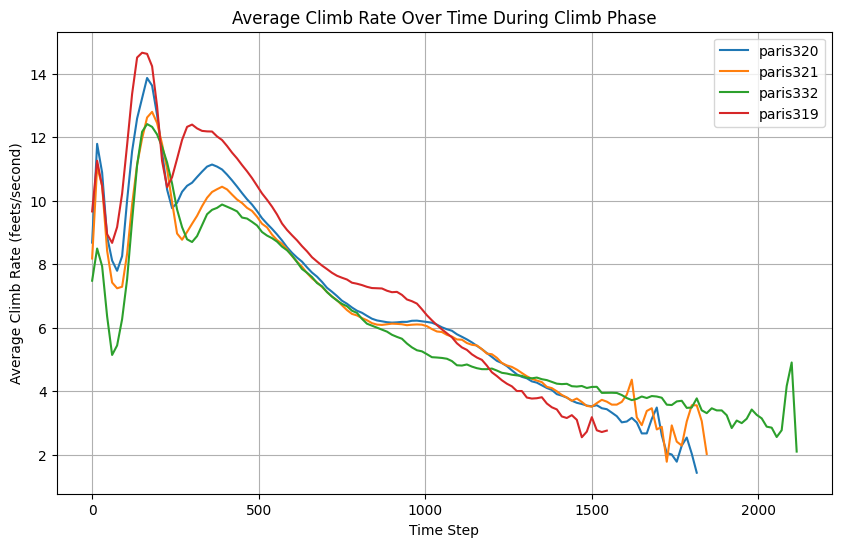

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the .pkl files
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'

# Filenames of the .pkl files
filenames = ['paris320.pkl', 'paris321.pkl', 'paris332.pkl', 'paris319.pkl']
aircraft_data = {}
airplane_models = ['paris320', 'paris321', 'paris332', 'paris319']

# Load data from each file
for file in filenames:
    path = f"{base_path}\\{file}"
    aircraft_data[file] = pd.read_pickle(path)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Process and plot data for each aircraft
for file, model in zip(filenames, airplane_models):
    # Extract the DataFrame for the current aircraft
    df = aircraft_data[file]
    
    df['climb_rate'] = df['baroaltitude'].diff() / df['timestep'].diff()

    # Calculate average climb rate over time
    average_climb_rate = df.groupby('timestep')['climb_rate'].mean()
    
    # Plotting
    plt.plot(average_climb_rate, label=model.replace('.pkl', ''))  # Clean up model name for the label

plt.title('Average Climb Rate Over Time During Climb Phase')
plt.xlabel('Time Step')
plt.ylabel('Average Climb Rate (feets/second)')
plt.legend()
plt.grid(True)
plt.show()


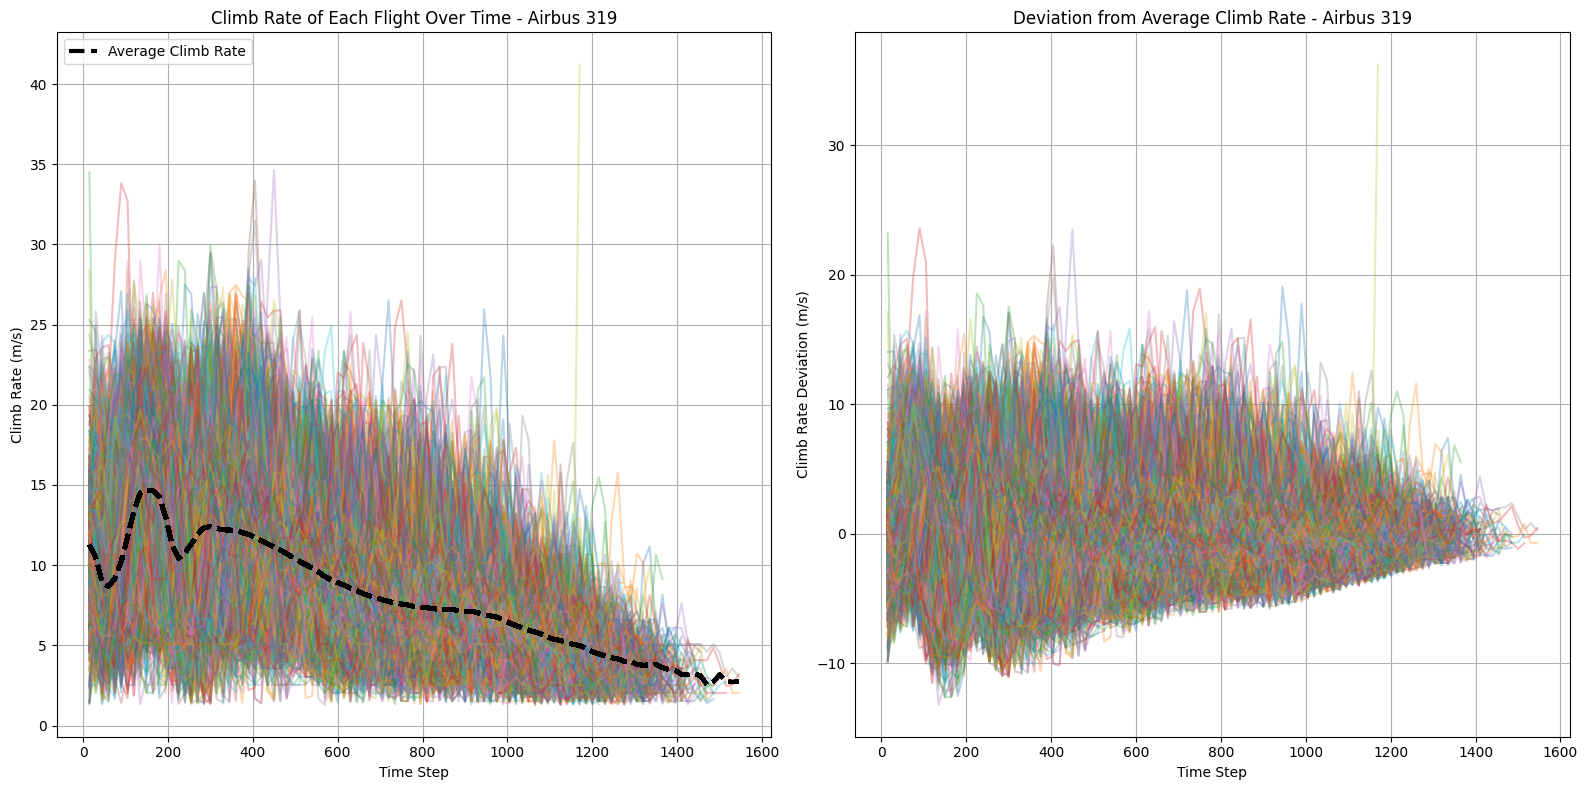

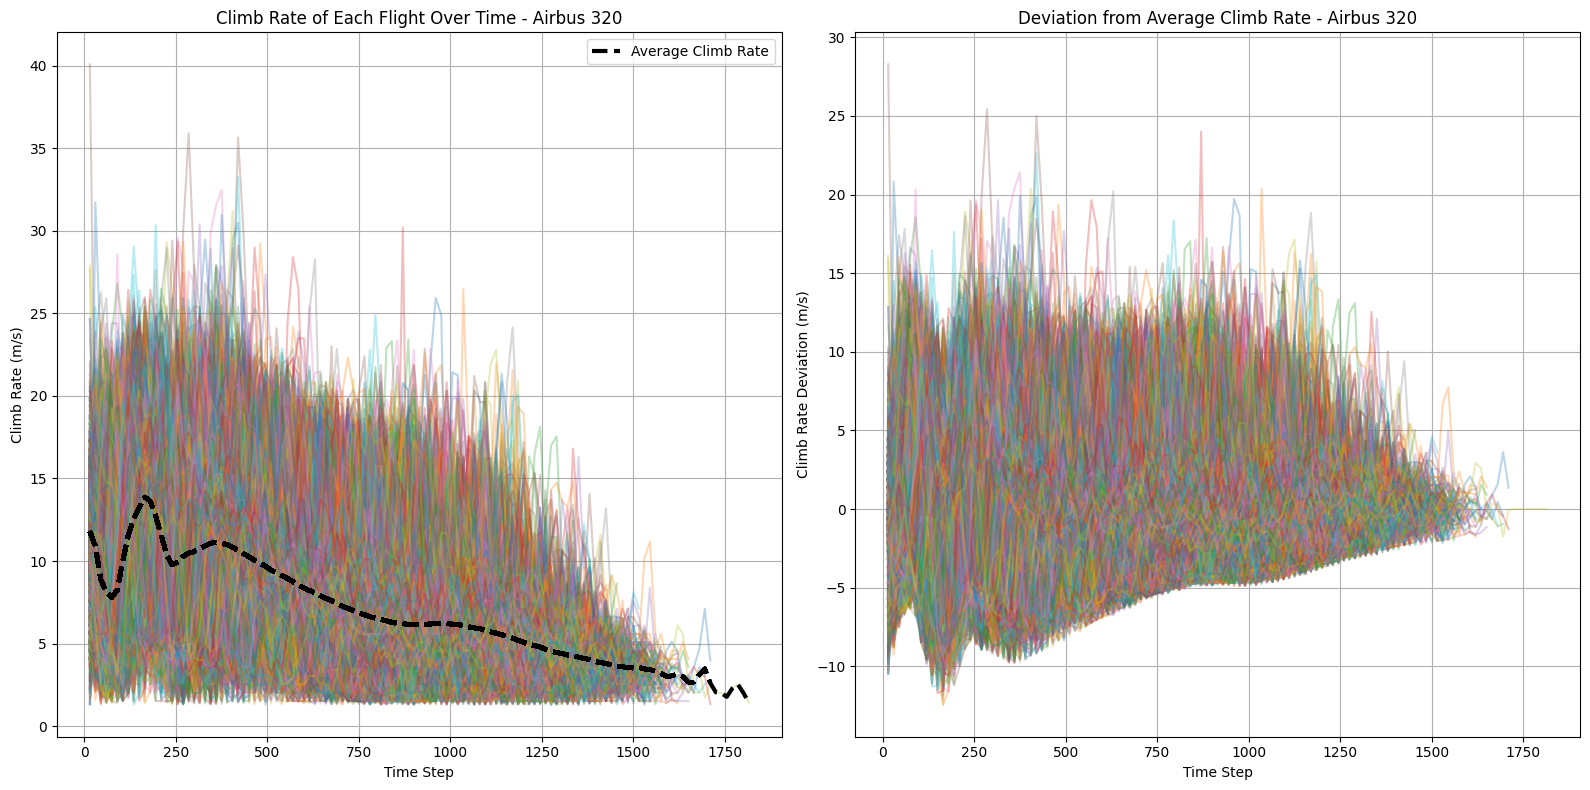

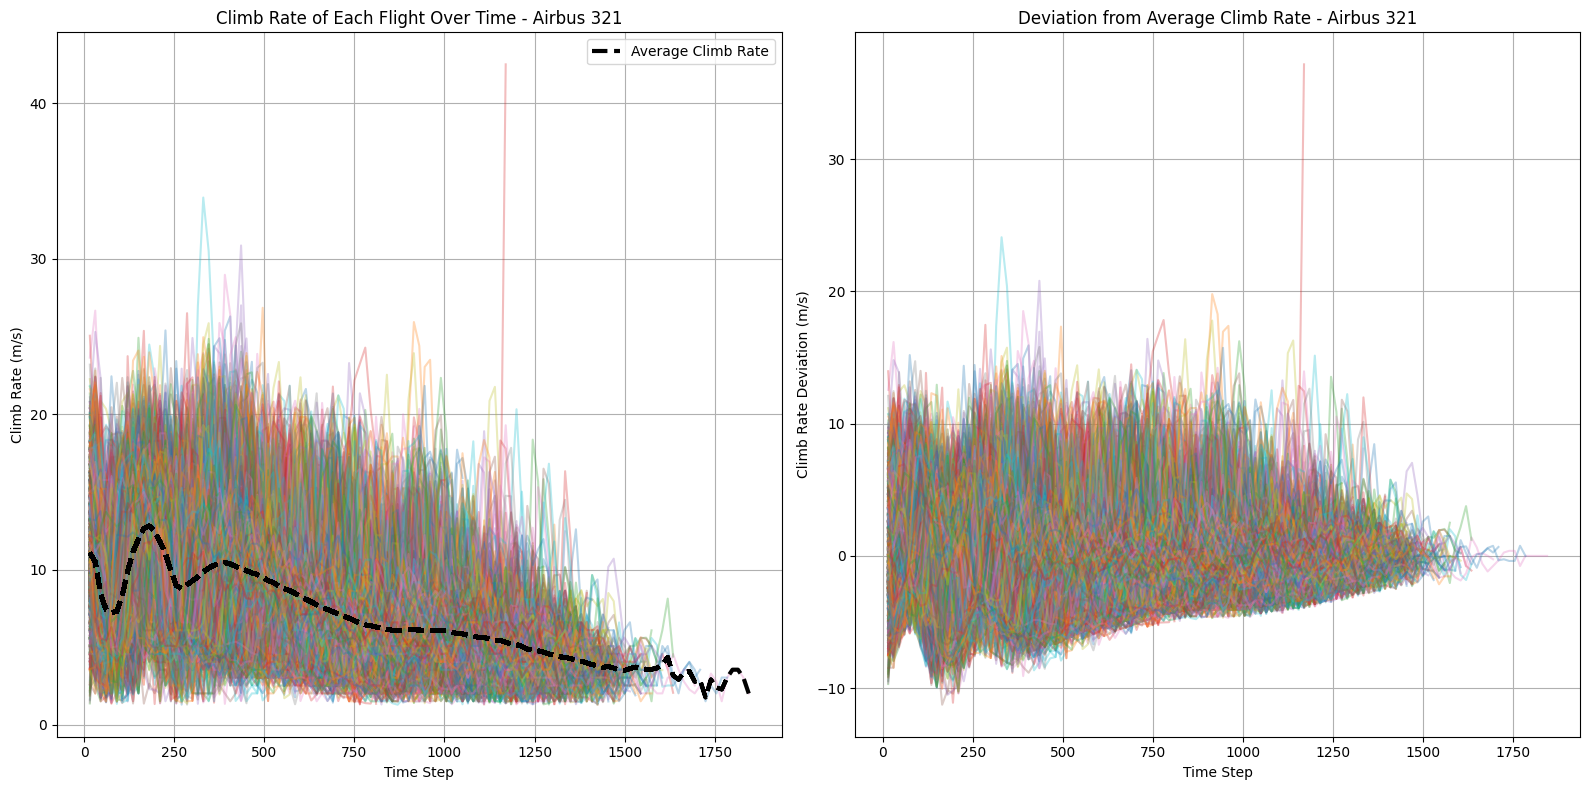

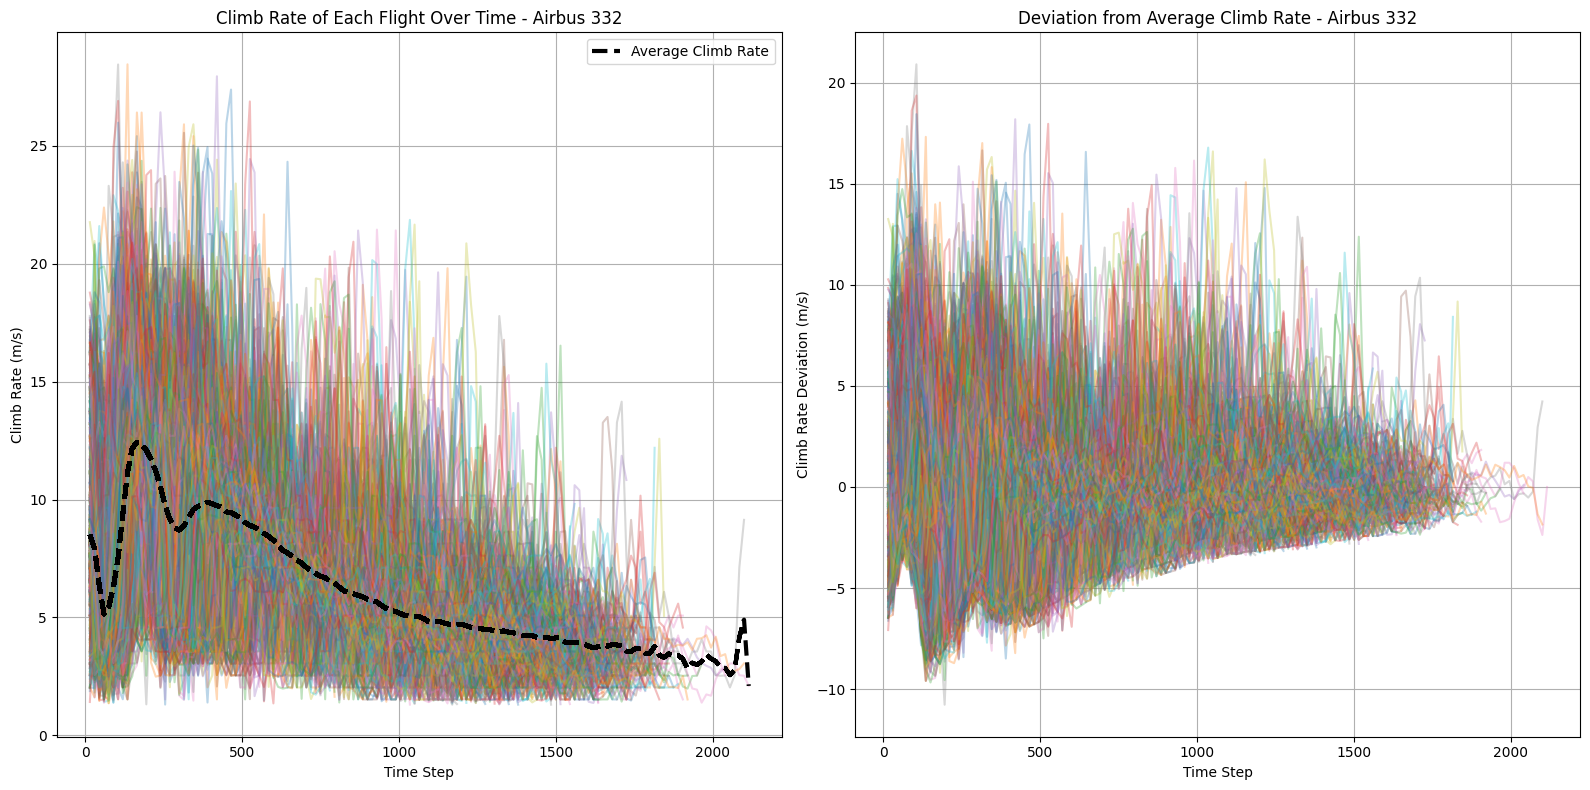

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot_climb_rate(df, title_suffix):
    # Sort the data by 'segment' and 'timestep' for accurate calculation
    df = df.sort_values(by=['segment', 'timestep'])

    # Calculate climb rate for each segment
    df['climb_rate'] = df.groupby('segment')['baroaltitude'].diff() / df.groupby('segment')['timestep'].diff()

    # Calculate the average climb rate across all flights
    df['avg_climb_rate'] = df.groupby('timestep')['climb_rate'].transform('mean')

    # Calculate the deviation from the average climb rate for each flight
    df['climb_rate_deviation'] = df['climb_rate'] - df['avg_climb_rate']

    # Prepare the figure for two plots (1 row, 2 columns)
    plt.figure(figsize=(16, 8))

    # Plot 1: Climb Rate of Each Flight
    plt.subplot(1, 2, 1)
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['climb_rate'], alpha=0.3)  # Add transparency
    plt.plot(df['timestep'], df['avg_climb_rate'], color='black', linestyle='--', linewidth=3, label='Average Climb Rate')
    plt.xlabel('Time Step')
    plt.ylabel('Climb Rate (m/s)')
    plt.title(f'Climb Rate of Each Flight Over Time - {title_suffix}')
    plt.grid(True)
    plt.legend()

    # Plot 2: Deviation from Average Climb Rate
    plt.subplot(1, 2, 2)
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['climb_rate_deviation'], alpha=0.3)
    plt.xlabel('Time Step')
    plt.ylabel('Climb Rate Deviation (m/s)')
    plt.title(f'Deviation from Average Climb Rate - {title_suffix}')
    plt.grid(True)

    # Adjust the layout
    plt.tight_layout()

    # Show both plots
    plt.show()

# Load the data
base_path = r'C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights'
filenames = ['paris319.pkl', 'paris320.pkl', 'paris321.pkl', 'paris332.pkl']
models = ['Airbus 319', 'Airbus 320', 'Airbus 321', 'Airbus 332']
dfs = [pd.read_pickle(f"{base_path}\\{filename}") for filename in filenames]

# Process and plot for each aircraft
for df, model in zip(dfs, models):
    process_and_plot_climb_rate(df, model)
